## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter
import random_forest_method
import performance_measure
import svm_method
import data_sampling
import split_data_set

Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from split_data_set.ipynb


In [2]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

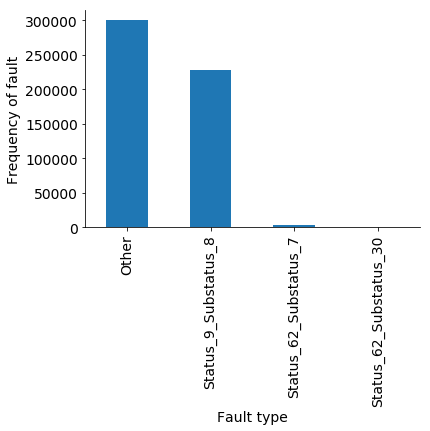

<Figure size 1440x1152 with 0 Axes>

In [3]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [4]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [9]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,50000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,50000,"Status_9_Substatus_8")

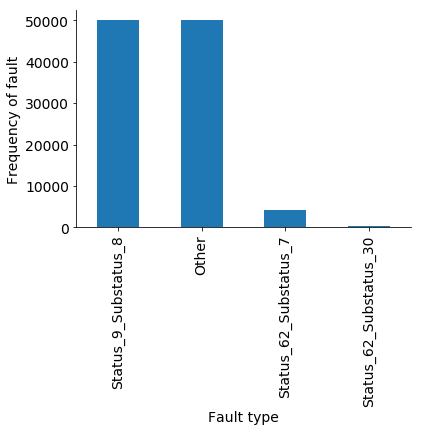

<Figure size 1440x1152 with 0 Axes>

In [10]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [11]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status

In [12]:
y.value_counts()

Status_9_Substatus_8      50000
Other                     50000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

### Split into training and test

In [13]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

## Random forest and feature importance

Normalized confusion matrix
[[0.9909697  0.         0.00266667 0.00636364]
 [0.35433071 0.64566929 0.         0.        ]
 [0.00813609 0.         0.99186391 0.        ]
 [0.00527273 0.         0.         0.99472727]]


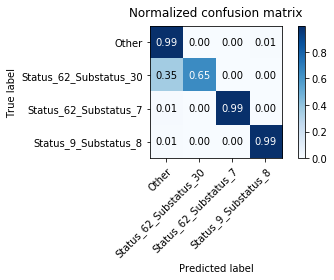

Total Accuracy 		0.992

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.991 		 0.991 		 0.991
Status_62_Substatus_30    	 1.000 		 0.646 		 0.785
Status_62_Substatus_7     	 0.968 		 0.992 		 0.980
Status_9_Substatus_8      	 0.994 		 0.995 		 0.994


In [14]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [15]:
rf

,importance
ActivePower,0.172567
Log-T-Raw-Rectifier1HeatSink,0.095907
Log-T-Raw-TransformerTemperature,0.086206
Log-T-Raw-Stator1Temperature,0.051233
Log-T-Raw-Rotor2Temperature,0.043862
Log-T-Raw-Stator2Temperature,0.039896
Log-T-Raw-Rectifier2HeatSink,0.039500
Log-T-Raw-Rotor1Temperature,0.036117
Log-T-Raw-NacelleAmbientTemperature,0.033348
Average blade angle across A B C,0.032143


# Preprocessing

### Scale dataset

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit(X)
scaled_X = scaled_X.transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=list(X))
scaled_X.head(10)

,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.524401,0.048309,0.255274,0.164345,0.000000,0.407895,0.245161,0.246753,0.433333,0.431818,...,0.178947,0.188889,0.375000,0.170213,0.240741,0.011765,0.120690,0.336,0.000000,0.446825
1,0.502116,0.070048,0.317300,0.779944,0.009492,0.618421,0.309677,0.331169,0.588889,0.590909,...,0.536842,0.566667,0.546875,0.372340,0.518519,0.505882,0.396552,0.456,0.000000,0.850806
2,0.518477,0.070048,0.403797,0.325905,0.000000,0.381579,0.283871,0.253247,0.400000,0.409091,...,0.284211,0.288889,0.343750,0.170213,0.240741,0.317647,0.310345,0.296,0.000000,0.552796
3,0.521580,0.149758,0.600844,0.835655,0.179530,0.618421,0.393548,0.344156,0.400000,0.454545,...,0.589474,0.444444,0.390625,0.372340,0.314815,0.517647,0.396552,0.568,0.000000,0.901801
4,0.507475,0.342995,0.878481,0.378830,0.976888,0.605263,0.419355,0.298701,0.400000,0.420455,...,0.663158,0.688889,0.265625,0.329787,0.351852,0.682353,0.568966,0.776,0.004454,0.581422
5,0.498731,0.135266,0.493249,0.103064,0.086669,0.592105,0.361290,0.350649,0.544444,0.556818,...,0.568421,0.588889,0.515625,0.361702,0.407407,0.470588,0.327586,0.424,0.000000,0.387867
6,0.475599,0.159420,0.501266,0.863510,0.000000,0.592105,0.329032,0.337662,0.533333,0.556818,...,0.810526,0.811111,0.562500,0.521277,0.444444,0.470588,0.344828,0.432,0.117815,0.889858
7,0.553173,0.050725,0.353165,0.682451,0.000000,0.605263,0.354839,0.344156,0.600000,0.613636,...,0.726316,0.766667,0.703125,0.393617,0.611111,0.517647,0.431034,0.440,0.000000,0.818768
8,0.486883,0.140097,0.507595,0.676880,0.000000,0.381579,0.270968,0.246753,0.433333,0.443182,...,0.821053,0.822222,0.437500,0.468085,0.314815,0.376471,0.206897,0.312,0.068505,0.770427
9,0.465444,0.258454,0.509283,0.353760,0.000000,0.578947,0.341935,0.331169,0.600000,0.625000,...,0.842105,0.833333,0.640625,0.510638,0.518519,0.541176,0.431034,0.408,0.198940,0.536114


### SVM method

In [ ]:
svm_method.get_svm_model(X_train, X_test, y_train, y_test)

Loading...
Training...


### SMOTE (Synthetic Minority Oversampling Technique):

In [ ]:
sm = SMOTE(random_state=12)
X_